<a href="https://colab.research.google.com/github/Frobbly/Caesar-Myszkowski-Cipher/blob/main/tomato_leaf_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download noulam/tomato

 99% 736M/743M [00:04<00:00, 160MB/s]
100% 743M/743M [00:04<00:00, 167MB/s]


In [ ]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
!rm tomato.zip

In [ ]:
%cd New Plant Diseases Dataset(Augmented)/

/content/New Plant Diseases Dataset(Augmented)


In [ ]:
%pwd

'/content/New Plant Diseases Dataset(Augmented)'

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from os import listdir

In [ ]:
training_dataset = "train"
validation_dataset = "valid"

train_data, test_data = [], []
directory_root = %pwd

CATEGORIES = ["Tomato___Bacterial_spot",
              "Tomato___Early_blight",
              "Tomato___Late_blight",
              "Tomato___Leaf_Mold",
              "Tomato___Septoria_leaf_spot",
              "Tomato___Spider_mites Two-spotted_spider_mite",
              "Tomato___Target_Spot",
              "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
              "Tomato___Tomato_mosaic_virus",
              "Tomato___healthy"]

try:
    print("[Console] Loading images for training dataset...")
    for category in CATEGORIES:
      print(f"[Console] Processing {category} ...")
      label = CATEGORIES.index(category)
      path = f"{training_dataset}/{category}"
      print(path)
      for image_file in listdir(path):
        image_directory = (f"{training_dataset}/{category}/{image_file}")
        print(image_directory)
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
          image = cv.imread(image_directory,1)
          image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
          image = cv.resize(image,(64,64))            
          train_data.append([image,label])

    print("[Console] Loading images for testing dataset...")
    for category in CATEGORIES:
      print(f"[Console] Processing {category} ...")
      label = CATEGORIES.index(category)
      path = f"{validation_dataset}/{category}"
      print(path)
      for image_file in listdir(path):
        image_directory = (f"{validation_dataset}/{category}/{image_file}")
        print(image_directory)
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
          image = cv.imread(image_directory,1)
          image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
          image = cv.resize(image,(64,64))            
          test_data.append([image,label])

    print("[Console] Image loading completed.")  
except Exception as e:
    print(f"Error : {e}")

print(len(train_data))
print(len(test_data))

Streaming output truncated to the last 5000 lines.
train/Tomato___healthy/1a972145-610d-4efe-96e7-e0253c4ece4a___GH_HL Leaf 237.1.JPG
train/Tomato___healthy/3bbaca2e-d2fd-4fcb-bbd7-e1ad4f7a84ae___RS_HL 0630.JPG
train/Tomato___healthy/3d0c2ad7-4fc4-48df-9ee0-11932921ddd0___RS_HL 0633_newPixel25.JPG
train/Tomato___healthy/dd50e041-1df0-45e4-8ab7-126f0ae2b984___GH_HL Leaf 270.JPG
train/Tomato___healthy/4a077dcb-30be-4f8d-9dc9-00f3874b1676___GH_HL Leaf 465_flipTB.JPG
train/Tomato___healthy/1732045f-a451-4325-aa86-717a8cbdaf02___RS_HL 9698.JPG
train/Tomato___healthy/fcf52850-1cc7-4b7a-8e89-3c3ec1f4be1d___RS_HL 9766.JPG
train/Tomato___healthy/c3724cd0-50c4-4780-8dc8-fe3e9d0d0680___GH_HL Leaf 292.JPG
train/Tomato___healthy/38670ac4-67ad-4b00-a37b-3fb82d58aa86___RS_HL 9762.JPG
train/Tomato___healthy/2a089ff8-0fcf-4b18-b746-f997e3b18065___GH_HL Leaf 456.1_new30degFlipLR.JPG
train/Tomato___healthy/3200dbab-2da4-49c9-bd74-34d67e763b22___RS_HL 0562.JPG
train/Tomato___healthy/2a7e1698-9747-40e6-994

In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])
    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append("Bacterial Spot")
    elif i==1:
        Y.append("Early Blight")
    elif i==2:
        Y.append("Late Blight")
    elif i==3:
        Y.append("Leaf Mold")
    elif i==4:
        Y.append("Septoria Leaf Spot")
    elif i==5:
        Y.append("Two-spotted Spider Mite")
    elif i==6:
        Y.append("Target Spot")
    elif i==7:
        Y.append("Yellow Leaf Curl Virus")
    elif i==8:
        Y.append("Mosaic Virus")
    else:
        Y.append("Healthy")

len(X_train),len(y_train)

X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Bacterial Spot")
    elif i==1:
        Z.append("Early Blight")
    elif i==2:
        Z.append("Late Blight")
    elif i==3:
        Z.append("Leaf Mold")
    elif i==4:
        Z.append("Septoria Leaf Spot")
    elif i==5:
        Z.append("Two-spotted Spider Mite")
    elif i==6:
        Z.append("Target Spot")
    elif i==7:
        Z.append("Yellow Leaf Curl Virus")
    elif i==8:
        Z.append("Mosaic Virus")
    else:
        Z.append("Healthy")

len(X_test),len(y_test)

7
8
2
6
5
2
1
5
1
0


(4585, 4585)

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(18345, 64, 64, 3)

In [ ]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 64, 64, 3)

In [ ]:
order = ["Bacterial Spot",
         "Early Blight",
         "Late Blight",
         "Leaf Mold",
         "Septoria Leaf Spot",
         "Two-spotted Spider Mite",
         "Target Spot",
         "Yellow Leaf Curl Virus",
         "Mosaic Virus",
         "Healthy"]

Text(0.5, 0, 'Image Count')

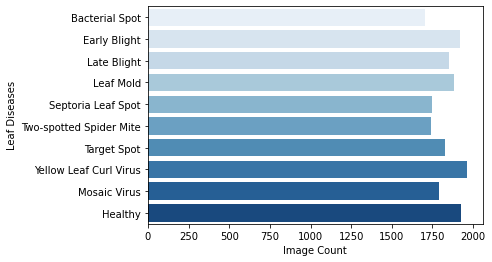

In [ ]:
ax=sns.countplot(y = Y,
                 order = order,
                 palette = "Blues")
ax.set_ylabel("Leaf Diseases")
ax.set_xlabel("Image Count")

Text(0.5, 0, 'Image Count')

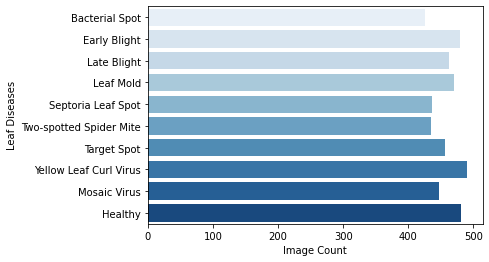

In [ ]:
ax=sns.countplot(y = Z,
                 order = order,
                 palette = "Blues")
ax.set_ylabel("Leaf Diseases")
ax.set_xlabel("Image Count")

In [ ]:
one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

In [ ]:
classifier.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
history = classifier.fit(X_train,
                      one_hot_train,
                      epochs=16,
                      batch_size = 32,
                      validation_split = 0.25,
                      verbose = 1
                      )

Epoch 1/16
430/430 [==============================] - 106s 244ms/step - loss: 1.6613 - accuracy: 0.3954 - val_loss: 1.0583 - val_accuracy: 0.6337
Epoch 2/16
430/430 [==============================] - 103s 240ms/step - loss: 0.7932 - accuracy: 0.7192 - val_loss: 0.6552 - val_accuracy: 0.7855
Epoch 3/16
430/430 [==============================] - 103s 241ms/step - loss: 0.5267 - accuracy: 0.8102 - val_loss: 0.4657 - val_accuracy: 0.8402
Epoch 4/16
430/430 [==============================] - 105s 244ms/step - loss: 0.4375 - accuracy: 0.8439 - val_loss: 0.4839 - val_accuracy: 0.8228
Epoch 5/16
430/430 [==============================] - 103s 241ms/step - loss: 0.3660 - accuracy: 0.8713 - val_loss: 0.3152 - val_accuracy: 0.8967
Epoch 6/16
430/430 [==============================] - 104s 241ms/step - loss: 0.3157 - accuracy: 0.8875 - val_loss: 0.3195 - val_accuracy: 0.8788
Epoch 7/16
430/430 [==============================] - 105s 245ms/step - loss: 0.2934 - accuracy: 0.8950 - val_loss: 0.3983 -

In [ ]:
scores = classifier.evaluate(X_test,one_hot_test)

print('Test Loss:',scores[0] * 100,'%') 
print('Test Accuracy:',scores[1] * 100,'%')

144/144 [==============================] - 9s 63ms/step - loss: 0.1986 - accuracy: 0.9324
Test Loss: 19.858714938163757 %
Test Accuracy: 93.23882460594177 %


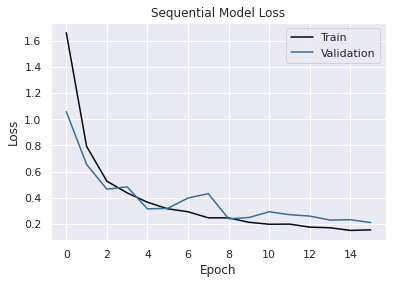

In [ ]:
plt.plot(history.history['loss'], '#03080c')
plt.plot(history.history['val_loss'], '#336ea0')
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

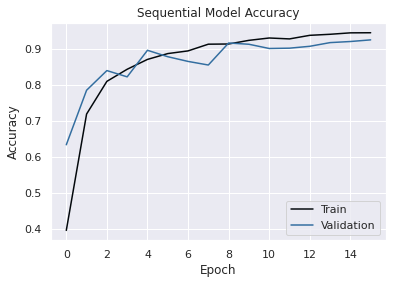

In [ ]:
plt.plot(history.history['accuracy'], '#03080c')
plt.plot(history.history['val_accuracy'], '#336ea0')
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

In [ ]:
y_prediction = classifier.predict(X_test)

y_pred_classes = np.argmax(y_prediction,axis = 1) 

y_true = np.argmax(one_hot_test,axis = 1) 

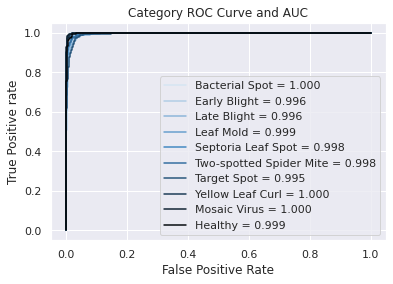

In [ ]:
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prediction[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='#d6e5f2',label='Bacterial Spot = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='#b1cee6',label='Early Blight = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='#8cb6da',label='Late Blight = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='#679fce',label='Leaf Mold = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='#4288c2',label='Septoria Leaf Spot = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='#336ea0',label='Two-spotted Spider Mite = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='#27557b',label='Target Spot = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='#1b3b56',label='Yellow Leaf Curl = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='#0f2231',label='Mosaic Virus = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='#03080c',label='Healthy = %0.3f' % roc_auc[9])
plt.title('Category ROC Curve and AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.legend(loc='best')

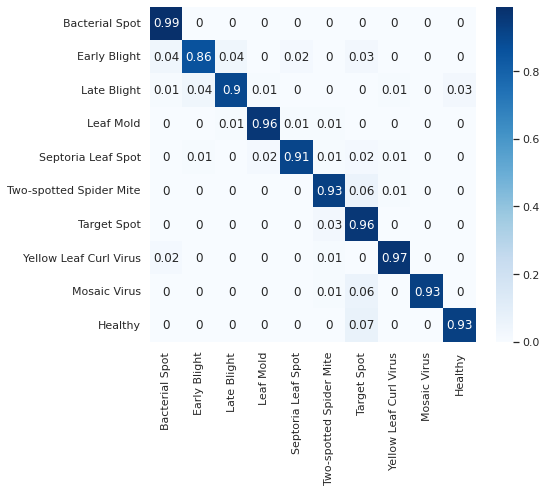

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
con_mat_norm = np.around(confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = order, 
                     columns = order)
plt.figure(figsize=(8,7))
sns.heatmap(con_mat_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

In [ ]:
print("[Console] Saving model...")
%cd ..
pickle.dump(classifier,open('cnn_model.pkl', 'wb'))

[Console] Saving model...
/content
INFO:tensorflow:Assets written to: ram://78a6959f-c7a1-421a-906d-f374d892b723/assets
